In [6]:
!pip freeze > requirements.txt

In [2]:
!ls

REGRESIONES-02-peso-especifico.ipynb requirements.txt


In [8]:
from IPython.display import FileLink
FileLink('requirements.txt')

/Users/abc/Desktop/IA/6 -  REGRESIONES/2025-06-24 REGRESIONES/requirements.txt

In [ ]:
# PESO ESPECÍFICO (Unidades de g/cm3)
# barras de base 1 cm2 y largo 'l'
# R peso específico -> hay que estimar
# se pesan las barras con una balanza con errores (pequeños pero desconocidos)

import requests
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [10]:
def coef_corr(x, y):
    '''Dados, dos np.arrays 'x' e 'y', calcula el coeficiente de correlación
    para un ajuste lineal calculado por mínimos cuadrados. Es el coeficiente de
    correlación de Pearson, que indica que tan buena es la relación lineal entre
    dos variables, siendo 1 ó -1 correlación perfecta y 0 nula correlación'''
    arriba = sum(((x - x.mean())*(y-y.mean())))
    abajo = sum(((x-x.mean())**2)) * sum(((y -y.mean())**2))
    corr = arriba / np.sqrt(abajo)

    return corr


In [11]:
enlace = 'https://raw.githubusercontent.com/python-unsam/Programacion_en_Python_UNSAM/master/Notas/11_Recursion/longitudes_y_pesos.csv'
r = requests.get(enlace).content
data_lyp = pd.read_csv(io.StringIO(r.decode('utf-8')))
data_lyp.columns = ['longitud', 'peso']  # pd.dataframe
data_lyp

,longitud,peso
0,19.1,136.92
1,18.3,132.22
2,3.1,20.27
3,10.1,71.70
4,10.8,77.26
...,...,...
95,6.0,44.29
96,19.1,138.61
97,11.9,85.28
98,16.8,120.72


In [12]:
data_lyp2=pd.read_csv(enlace)
data_lyp2

,longitud,peso
0,19.1,136.92
1,18.3,132.22
2,3.1,20.27
3,10.1,71.70
4,10.8,77.26
...,...,...
95,6.0,44.29
96,19.1,138.61
97,11.9,85.28
98,16.8,120.72


In [13]:
data_lyp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   longitud  100 non-null    float64
 1   peso      100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [ ]:
print(data_lyp.describe())
print(data_lyp.head())

# se pesan las barras
# count: cantidad de datos (filas) no nulos en cada columna.
# mean: promedio de los valores.
# std: desviación estándar (medida de dispersión).
# min: valor mínimo.

         longitud        peso
count  100.000000  100.000000
mean    14.187000  102.187700
std      6.640048   47.817424
min      3.100000   20.270000
25%      7.600000   55.877500
50%     14.500000  105.185000
75%     19.625000  141.105000
max     25.000000  179.770000
   longitud    peso
0      19.1  136.92
1      18.3  132.22
2       3.1   20.27
3      10.1   71.70
4      10.8   77.26


In [ ]:
# Extraemos las columnas del DataFrame como Series
peso = data_lyp['peso']        # Variable dependiente (target Y)
longitud = data_lyp['longitud']  # Variable independiente (feature X)

# ------------------------------------------------------------------------------------
# SE BUSCA PREDECIR EL PESO CON LA LONGITUD
# ------------------------------------------------------------------------------------
# Creamos el modelo de regresión lineal
lyp = linear_model.LinearRegression(fit_intercept=False)   # No hay ordenada al origen
# 🎯 ¿Qué se busca encontrar?

# El coeficiente de proporcionalidad entre las dos variables.
# Básicamente, se está probando si existe una relación directamente proporcional:
# peso∝longitud
# El número que devuelve (R) es esa constante de proporcionalidad.

# lyp DEVUELVE 7.202... es el coeficiente → significa que:
# 👉 Por cada 1 unidad que aumenta la longitud, el peso aumenta en promedio 7.20 unidades.
# ------------------------------------------------------------------------------------
# 📌 ENTRENAMOS EL MODELO de regresión lineal
# X = data_lyp[['longitud']] → variable independiente (lo que explica, predictor)
#    - Se usa con doble corchete para que quede en formato DataFrame (2D),
#      que es lo que sklearn espera como input.
# Y = data_lyp['peso'] → variable dependiente (lo que queremos predecir)
lyp.fit(data_lyp[['longitud']], data_lyp['peso'])

# 📌 fit() → ENTRENAR EL MODELO
# Toma los datos de entrada (X = longitud) y los valores reales (Y = peso).
# Ajusta la recta que mejor representa la relación entre ambas variables.
# ------------------------------------------------------------------------------------
# 📌 Obtenemos el coeficiente (pendiente de la recta)
# lyp.coef_ devuelve un array con los coeficientes de cada variable independiente.
# Como solo tenemos UNA variable (longitud), el array tendrá un solo valor.
# Ejemplo: array([7.20237269])
R = lyp.coef_[0]   # Extraemos ese único valor → queda como número float
# ------------------------------------------------------------------------------------
# 📌 Interpretación del resultado
# El modelo ajustado tiene la forma:  peso ≈ R * longitud
# R = 7.20 (aprox) significa:
# → Por cada 1 unidad que aumenta la longitud, el peso aumenta en promedio 7.20 unidades.
print(R)  # Muestra el valor de la pendiente



7.202372690217998


In [ ]:
# 📌 Paso 1: calcular predicciones del modelo
# 📌 predict() → HACER PREDICCIONES
# Una vez entrenado, el modelo ya "aprendió" la pendiente R (≈ 7.20).
# Con predict(), usamos esa recta para estimar nuevos valores de Y a partir de X.
# En este caso: dado un valor de longitud, devuelve el peso estimado.
predicciones = lyp.predict(data_lyp[['longitud']])
print(predicciones)  # Muestra las predicciones del modelo
# ------------------------------------------------------------------------------------
# 📌 Paso 2: calcular errores (residuos)
# El error es la diferencia entre el valor real y el valor predicho.
# Si el error es 0 → el modelo predijo perfecto.
errores = peso - predicciones
print(errores)
# ------------------------------------------------------------------------------------
# 📌 Paso 3: calcular el ECM (Error Cuadrático Medio)
# 1. Elevamos los errores al cuadrado → (errores**2), para que no se cancelen positivos y negativos.
# 2. Calculamos el promedio de esos valores con .mean().
# El resultado mide qué tan lejos están, en promedio, las predicciones de los valores reales.
ecm = (errores**2).mean()
# ------------------------------------------------------------------------------------
# 📌 Paso 4: mostrar el resultado
# Un ECM más pequeño significa que el modelo se ajusta mejor a los datos.
print(ecm)  # ≈ 0.9291 en tu ejemplo 
# MENOS DE 1 CENTIMETRO DE ERROR


[137.56531838 131.80342023  22.32735534  72.74396417  77.78562505
  99.39274313 108.03559035 169.97599549 178.61884272 127.48199662
 161.33314826  54.01779518 103.71416674 100.11298039 149.80935196
  94.35108224 148.36887742 125.32128481 163.49386007  45.37494795
  45.37494795 129.64270842  54.73803245  43.93447341  98.67250586
  40.33328707  28.80949076 119.55938666 104.43440401 110.91653943
 104.43440401  62.6606424   87.14870955  36.73210072 151.97006376
  28.08925349 124.60104754  41.05352433 111.6367767   96.51179405
  87.86894682 114.51772577 172.85694457  27.36901622  39.6130498
  57.61898152 175.73789364 158.45219918  25.92854168  39.6130498
  83.54752321 136.84508111  33.85115164  34.57138891  22.32735534
 100.83321766 167.81528368  68.42254056  54.73803245 154.85101284
 139.00579292 160.61291099  46.81542249 151.97006376 120.27962393
 126.76175935 100.11298039 140.44626746  59.05945606 151.97006376
 118.83914939 168.53552095  43.93447341 161.33314826 113.79748851
  28.0892534

In [33]:
import pandas as pd

# 📌 1. Calcular la correlación de Pearson
# corr() devuelve el coeficiente de correlación r (-1 a 1)

r = longitud.corr(peso)

# r (correlación de Pearson):
# Te dice qué tan lineal es la relación entre longitud y peso.
# Ejemplo:
# r ≈ 1 → a mayor longitud, mayor peso (relación casi perfecta).
# r ≈ 0 → no hay relación lineal clara.
# ------------------------------------------------------------------------------------
# 📌 2. Calcular el coeficiente de determinación R²
# Es simplemente r al cuadrado
R2 = r**2
# R² (coeficiente de determinación):
# Te dice qué porcentaje de la variación de peso se explica con longitud.
# Ejemplo:
# R² = 0.95 → el 95% del peso se puede “explicar” por la longitud.
# R² = 0.40 → solo el 40% del peso se explica por la longitud; 
# el resto depende de otras variables (edad, especie, alimentación, etc.).
# ------------------------------------------------------------------------------------
# 📌 3. Mostrar resultados
print("r (correlación de Pearson):", r)
print("R² (coeficiente de determinación):", R2)

r (correlación de Pearson): 0.9997948247765533
R² (coeficiente de determinación): 0.999589691649979


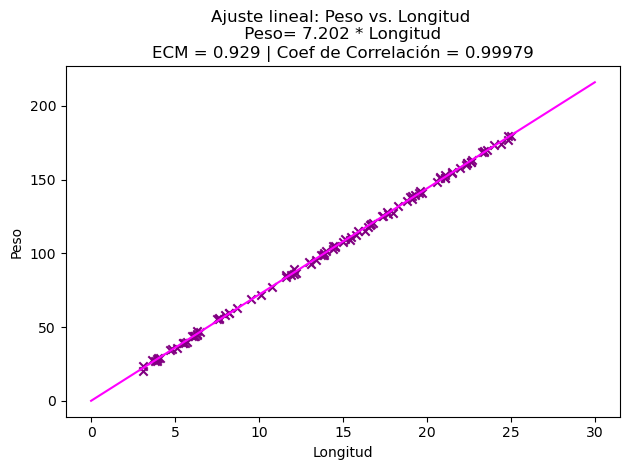

In [34]:
minlong = 0.    # límite inf para ver el ajuste
maxlong = 30.   # lím superior
grilla_longitud = np.linspace(start = minlong, stop = maxlong, num = 1000)
grilla_peso = grilla_longitud * R   # recta de ajuste x mínimos cuadrados

fig = plt.scatter(longitud, peso, c ='purple', marker = 'x') # x violetas
  # acomoda los elementos del gráfico
# Agrego la ecuación de la recta fiteada al título, valores redondeados con
# 3 decim como cifra significativa
plt.title(f'Ajuste lineal: Peso vs. Longitud \n '
          f'Peso= {round(R, 3)} * Longitud \n'
          f'ECM = {round(ecm, 3)} | Coef de Correlación = '
          f'{round(coef_corr(longitud, peso), 5)}')
plt.plot(grilla_longitud, grilla_peso, c = 'magenta') # magenta p/ recta fitted
plt.xlabel('Longitud')
plt.ylabel('Peso')
plt.tight_layout()
plt.show()
